In [20]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image


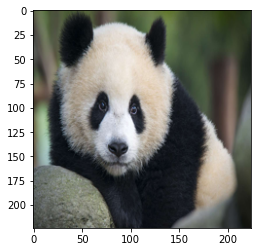

In [21]:
panda = np.array(Image.open('/Users/taehoonkim/Desktop/panda.jpeg').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

plt.imshow(panda)


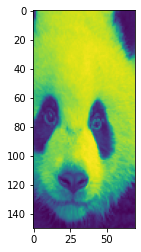

In [22]:
plt.imshow(panda_tensor[25:175,60:130,0].numpy())

##입력 데이터 x,y

In [27]:
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype),requires_grad=False).view(17,1)
    y = Variable(torch.from_numpy(train_Y).type(dtype),requires_grad=False)
    return X,y

##학습파라미터 w,b

In [28]:
def get_weights():
    w = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.randn(1), requires_grad = True)
    return w,b

##신경망 구현에 필요한 모든 파라미터(x,y,b,w)를 확보. w,x행렬 곱을 계산하고, 편향 b를 합한다. 이 값은 y의 예측값

In [29]:
def simple_network(x):
    y_pred = torch.matmul(x,w)+b
    return y_pred

##오차함수  예측값 y, 실제값y 사이의 차이를 구하고, 제곱

In [30]:
def loss_fn(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w,b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data

##학습률(learning rate)는 학습 파라미터의 값을 조정할 때 사용하는 기울기 적용 비율

In [31]:
def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [ ]:
from torch.nn import Linear
myLayer = Linear(in_features=10, out_features=5,bias=True)
